# setup and EDA

## import libraries

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import flake8
import pycodestyle_magic
import pandas as pd
import random
import requests
import zipfile
import os
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
print(tf.__version__)

2.5.0


## variables

In [25]:
num_classes = 10
Img_Size = 150
classes = ['airplane',
           'automobile',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'ship',
           'truck']


## methods

## obtain the data

In [26]:
'''
x_train: uint8 NumPy array of grayscale image data with shapes (50000, 32, 32, 3), 
 containing the training data. Pixel values range from 0 to 255.
y_train: uint8 NumPy array of labels (integers in range 0-9)
 with shape (50000, 1) for the training data.
x_test: uint8 NumPy array of grayscale image data with shapes (10000, 32, 32, 3),
 containing the test data. Pixel values range from 0 to 255.
y_test: uint8 NumPy array of labels (integers in range 0-9)
 with shape (10000, 1) for the test data.
 Label	Description
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck
'''    
(training_images,
 training_labels), (test_images,
                    test_labels) = tf.keras.datasets.cifar10.load_data()

## preprocess the data

In [27]:
## Normalization and Reshaping
assert training_images.shape == (50000, 32, 32, 3)
assert test_images.shape == (10000, 32, 32, 3)
assert training_labels.shape == (50000, 1)
assert test_labels.shape == (10000, 1)

# reduce the pizel values 
training_images=training_images / 255.0
test_images=test_images / 255.0

# flatten the label values
training_labels, test_labels = training_labels.flatten(), test_labels.flatten()

C:\Users\champ\Python_proj\venv\mach_learn_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[[Text(0, 0, 'airplane'),
  Text(1, 0, 'automobile'),
  Text(2, 0, 'bird'),
  Text(3, 0, 'cat'),
  Text(4, 0, 'deer'),
  Text(5, 0, 'dog'),
  Text(6, 0, 'frog'),
  Text(7, 0, 'horse'),
  Text(8, 0, 'ship'),
  Text(9, 0, 'truck')]]

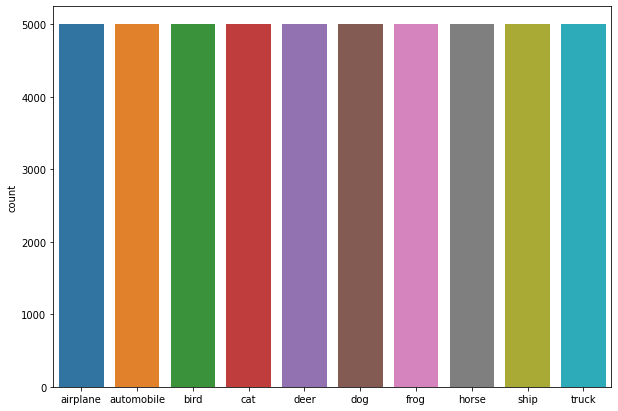

In [28]:
plt.figure(figsize=(10,7))
p = sns.countplot(training_labels.flatten())
p.set(xticklabels=classes)

## Check for any NaN values

In [29]:
if np.isnan(training_images).any()!=True:
    train_nan_num = 0
else:
    train_nan_num = np.isnan(training_images).any()

if np.isnan(test_images).any()!=True:
    test_nan_num = 0
else:
    test_nan_num = np.isnan(training_images).any()
    
print(f'\nThere are {train_nan_num} NaN value in the training data')

print(f'\nThere are {test_nan_num} NaN value in the test data')


There are 0 NaN value in the training data

There are 0 NaN value in the test data


## Label encoding

In [30]:
training_labels = tf.one_hot(training_labels.astype(np.int32), depth=10)
test_labels = tf.one_hot(test_labels.astype(np.int32), depth=10)

## visualize the data


Choice of class : 
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

The following picture is a automobile, number 2



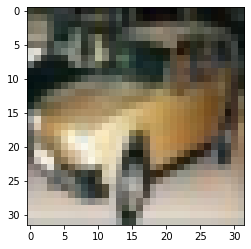

In [31]:
chosen = random.randint(1, 2000)

plt.imshow(training_images[chosen])
print(f'\nChoice of class : \n{classes}\n')
for nr,i in enumerate(training_labels[chosen]):
    if training_labels[chosen][nr] == 1:
        print(f'The following picture is a {classes[nr]}'
              f', number {nr+1}\n')

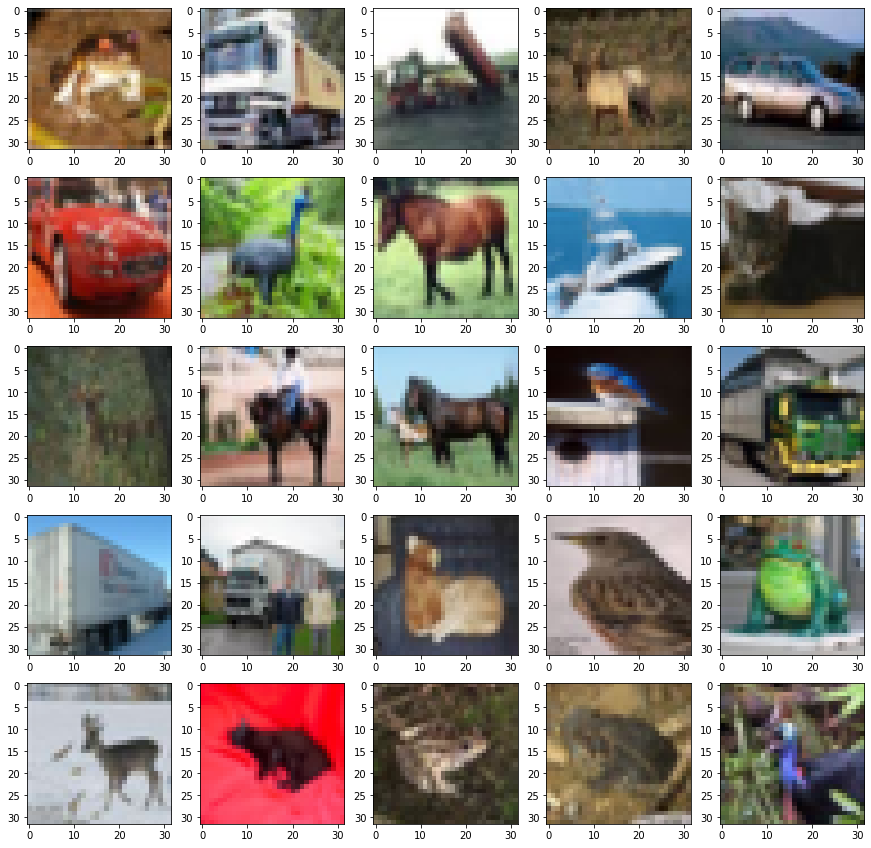

In [32]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5, figsize=(15,15))
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(training_images[k], aspect='auto')
        k += 1
 
plt.show()

# create, compile, fit, and predict

## build model

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same',
                           input_shape=training_images.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)         

## compile model

In [37]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

## model and fit the dataset

In [47]:
# fit
no_aug_model = model.fit(training_images,
                         training_labels,
                         validation_data=(test_images,
                                          test_labels), epochs=50)

history = no_aug_model

Epoch 1/50
1563/1563 [==============================] - 154s 99ms/step - loss: 0.6266 - acc: 0.7908 - val_loss: 0.7280 - val_acc: 0.7634
Epoch 2/50
1563/1563 [==============================] - 151s 96ms/step - loss: 0.6344 - acc: 0.7902 - val_loss: 0.6903 - val_acc: 0.7732
Epoch 3/50
1563/1563 [==============================] - 150s 96ms/step - loss: 0.6235 - acc: 0.7925 - val_loss: 0.6833 - val_acc: 0.7749
Epoch 4/50
1563/1563 [==============================] - 152s 97ms/step - loss: 0.6320 - acc: 0.7887 - val_loss: 0.6809 - val_acc: 0.7824
Epoch 5/50
1563/1563 [==============================] - 148s 95ms/step - loss: 0.6303 - acc: 0.7897 - val_loss: 0.6489 - val_acc: 0.7895
Epoch 6/50
1563/1563 [==============================] - 145s 93ms/step - loss: 0.6276 - acc: 0.7902 - val_loss: 0.6420 - val_acc: 0.7955
Epoch 7/50
1563/1563 [==============================] - 144s 92ms/step - loss: 0.6303 - acc: 0.7906 - val_loss: 0.7376 - val_acc: 0.7588
Epoch 8/50
1563/1563 [===================

## plot the losses

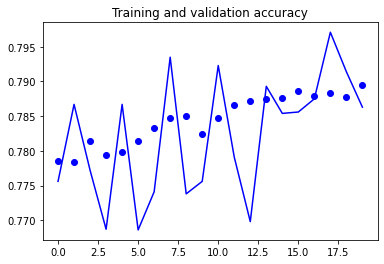

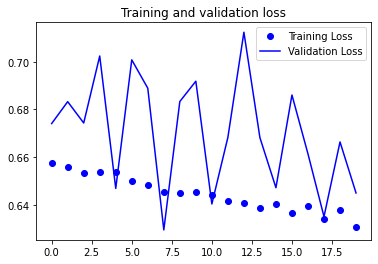

In [46]:
history = no_aug_model
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## model predict